In [1]:
## importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
##loading the dataset
data=pd.read_csv('heart.csv')

# Basic checks

In [3]:
data.head()#first five rows

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.tail()#last five rows

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
data.info()#to check null values and datatype

In [ ]:
data.describe()##used to view some basic statistical details like percentile, mean, std etc.

In [7]:
data.describe(include='O')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


# Exploratory Data Analysis (EDA)

### Univariate Analysis

In [11]:
data.shape

(918, 12)

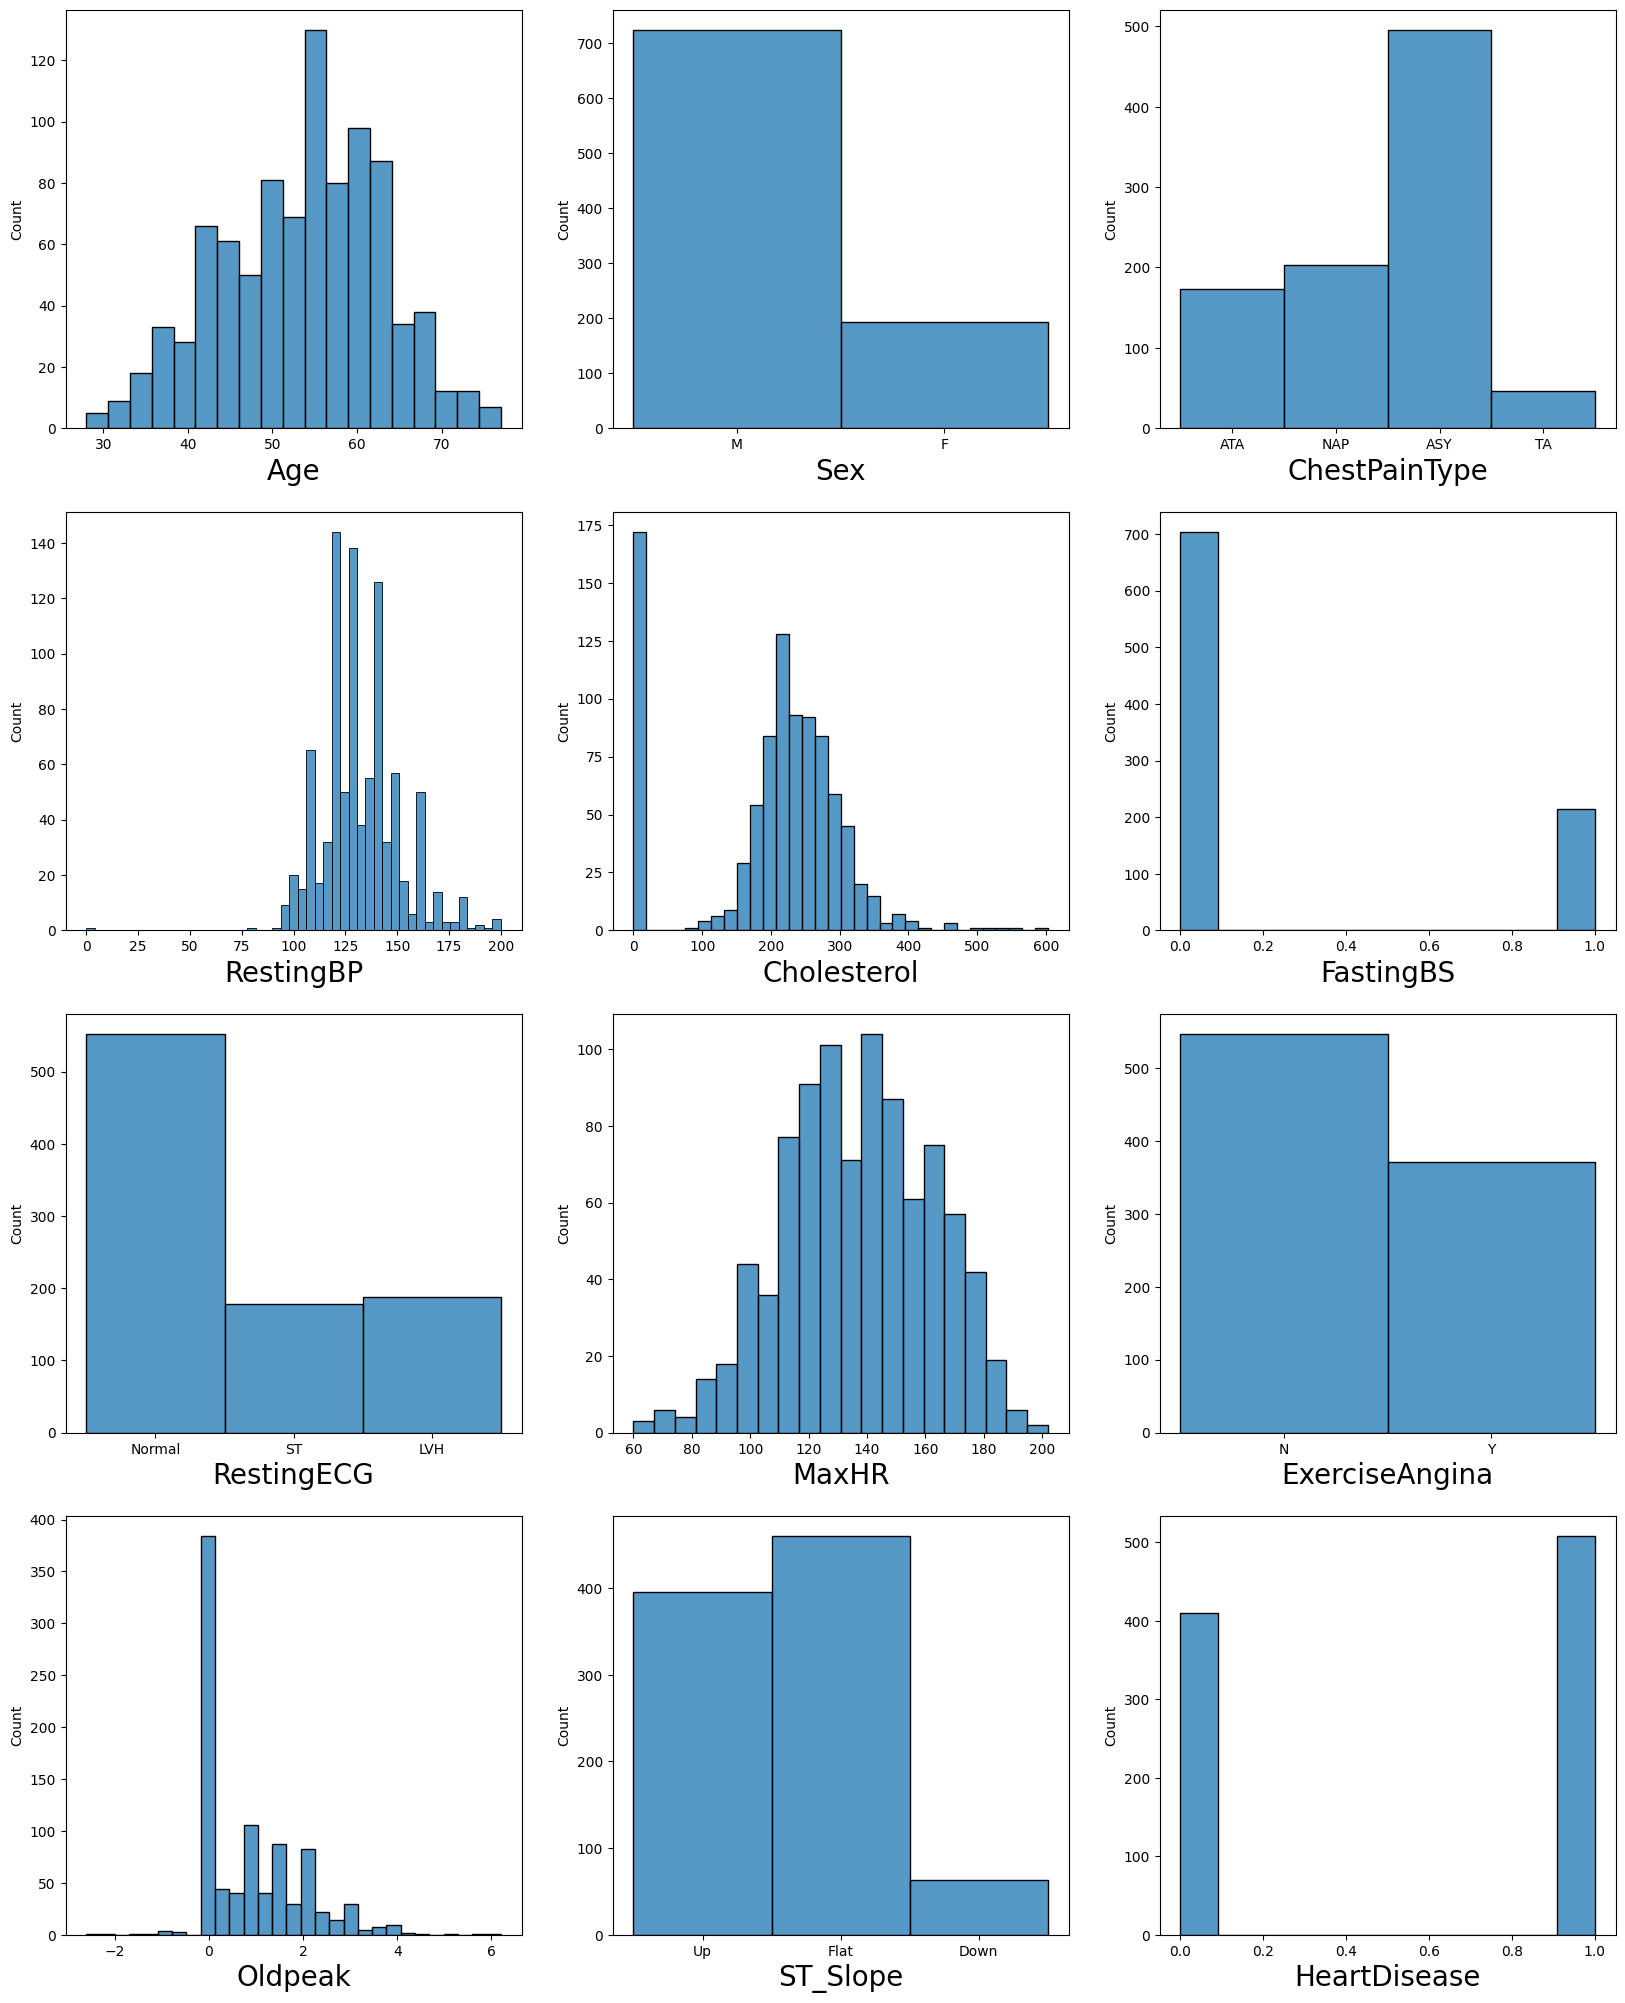

In [12]:
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas
for column in data.columns: # iteration of columns / acessing the columns from  dataset    # as there are 9 columns in the data
    ax = plt.subplot(4,3,plotnumber)# plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count
    sns.histplot(x=data[column]) ## it give frequency hue =value counts
    plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20
    plotnumber+=1 # increment of plotnumber
plt.show()# to show graph

### Bivariant Analysis

In [14]:
col=list(data.columns)

In [15]:
col.pop()

'HeartDisease'

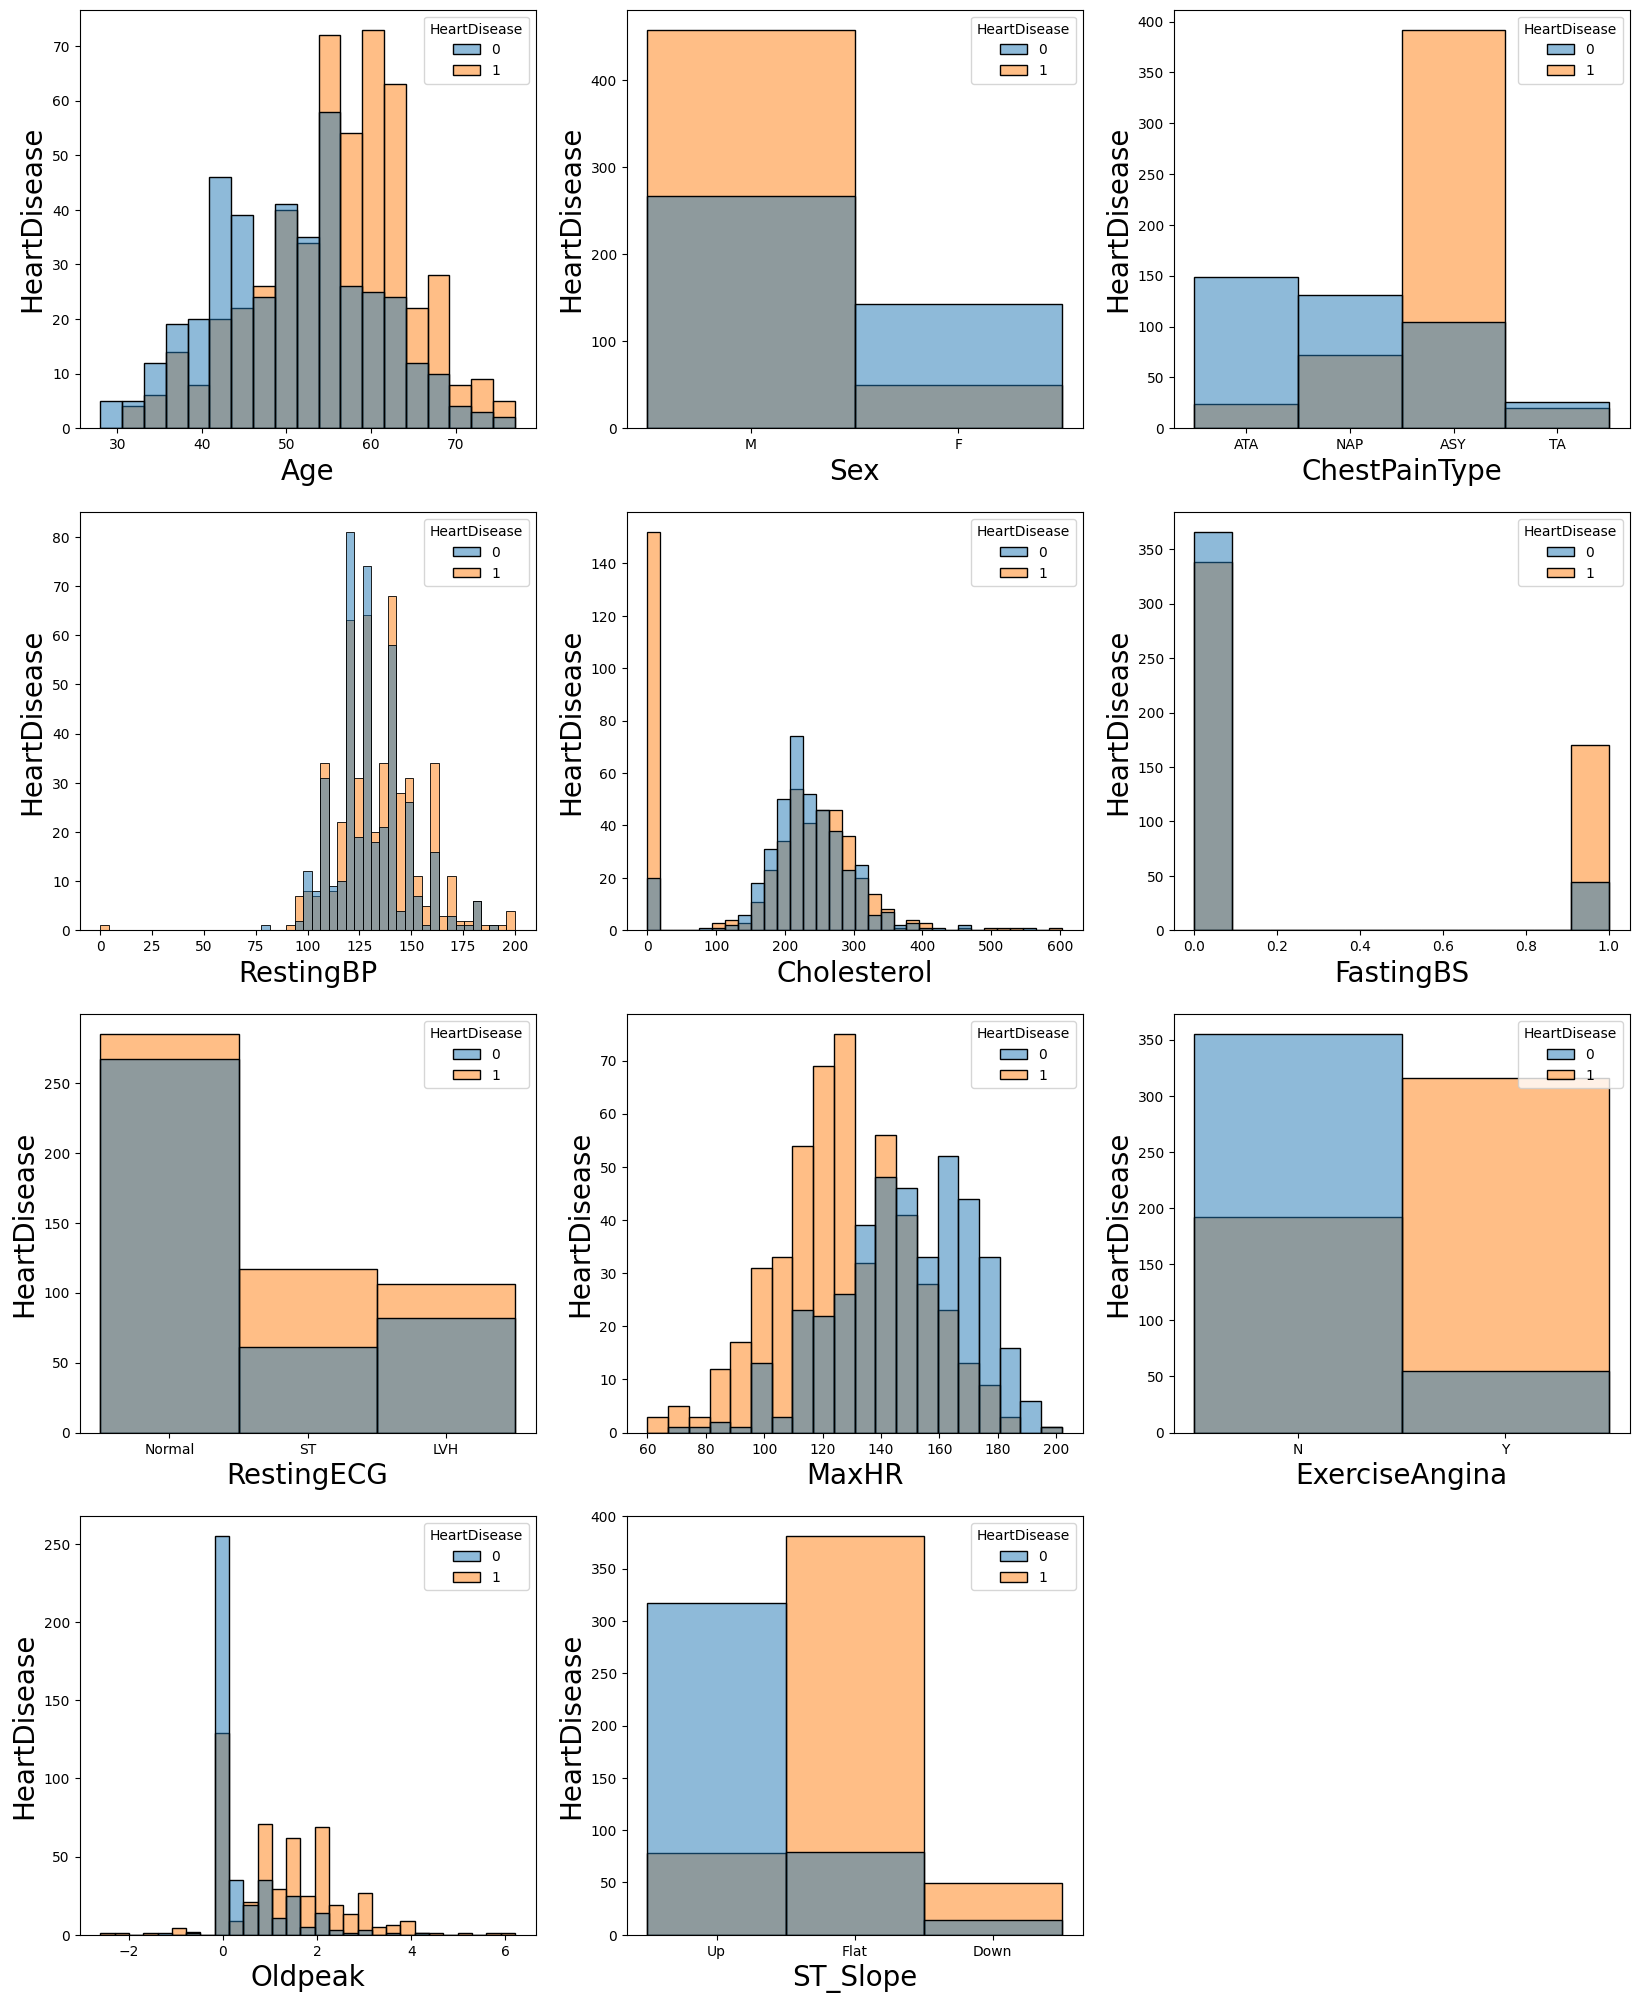

In [16]:
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas

for column in col: # iteration of columns / acessing the columns from  dataset    # as there are 9 columns in the data
    ax = plt.subplot(4,3,plotnumber)# plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count
    sns.histplot(x=data[column],hue=data.HeartDisease) ## it give frequency hue =value counts
    plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20
    plt.ylabel('HeartDisease',fontsize=20)#assigning name to y-axis and "name" font size is 20
    plotnumber+=1 # increment of plotnumber
plt.show()# to show graph

# Data preprocessing

### Checking for null values

In [17]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Conversion of categorical columns in to numerical columns

# 1.Sex

### Using LabelEncoder to convert

In [18]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb=LabelEncoder()
data.Sex=lb.fit_transform(data['Sex'])

In [23]:
data=pd.concat([data,pd.get_dummies(data.Sex)],axis=1)

In [24]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1


In [25]:
data.drop('Sex',axis=1,inplace=True)

# 2.ChestPain Type




### Frequency encoding

In [ ]:

data.head()

In [26]:
data.rename({'ChestPainType':'cpt'},axis=1,inplace=True)

In [ ]:
data.cpt

In [29]:
data.cpt.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [30]:
data.cpt.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: cpt, dtype: int64

In [31]:
data.loc[data['cpt']=='ASY','cpt']=3
data.loc[data['cpt']=='NAP','cpt']=2
data.loc[data['cpt']=='ATA','cpt']=1
data.loc[data['cpt']=='TA','cpt']=0



In [ ]:
data.head()

# 3. RestingECG

In [ ]:
## preprocessing data

In [32]:
data.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [33]:
data.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [34]:
data.loc[data['RestingECG']=='Normal','RestingECG']=2
data.loc[data['RestingECG']=='LVH','RestingECG']=1
data.loc[data['RestingECG']=='ST','RestingECG']=0

# ExerciseAngina

In [35]:
data['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [39]:
data.ExerciseAngina=data.ExerciseAngina.map({'Y':1,'N':0})

In [38]:
data1=data.copy()

In [ ]:
data1.head()

In [43]:
data=data1.copy()

# ST_Slope

In [44]:
data.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [45]:
data.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [46]:
data.loc[data['ST_Slope']=='Flat','ST_Slope']=2
data.loc[data['ST_Slope']=='Up','ST_Slope']=1
data.loc[data['ST_Slope']=='Down','ST_Slope']=0



### checking for constant columns

In [ ]:
data.describe()#check for std =0

# Feature Selection


<Axes: >

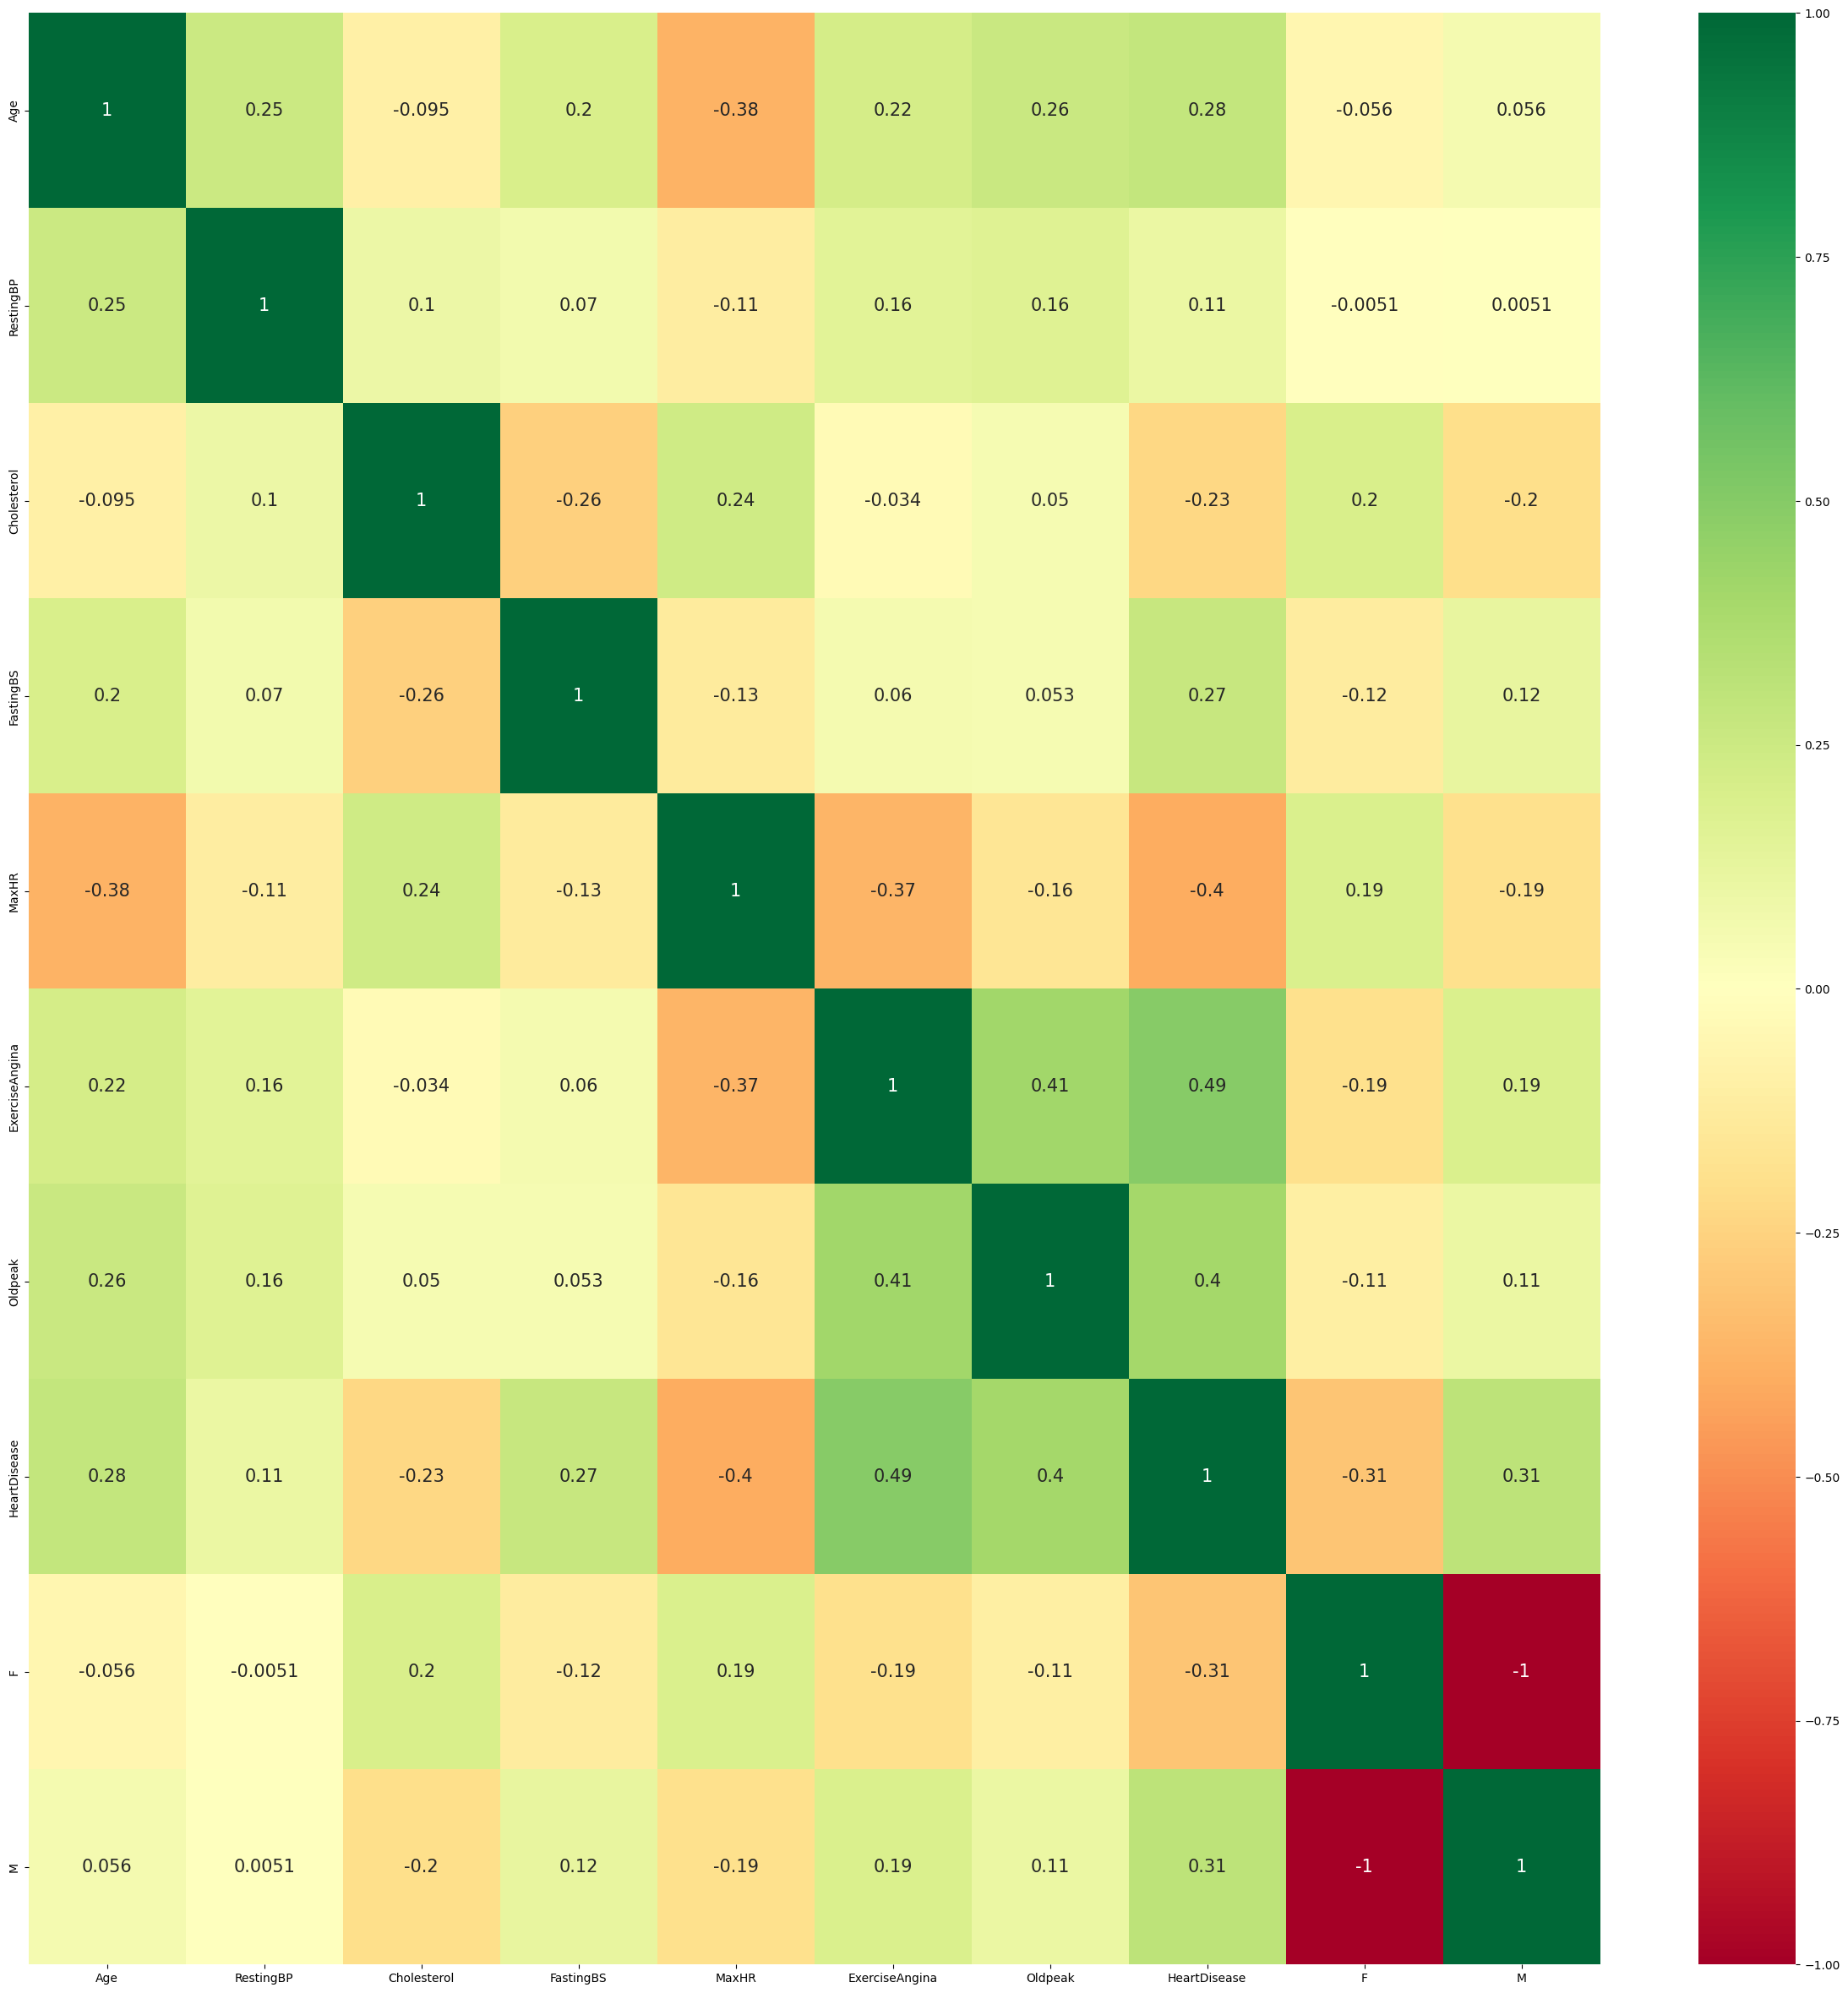

In [47]:
## Checking correlation

plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

# Model creation

In [48]:
data.columns

Index(['Age', 'cpt', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG',
       'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease', 'F',
       'M'],
      dtype='object')

In [49]:
## creating X and y
X=data.drop('HeartDisease',axis=1)
y=data.HeartDisease#dependent variabel or target

In [ ]:
X#calling y

In [50]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=3)

# what is Gradient Boosting ?
* Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error.

In [51]:
## importing the model library
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(X_train,y_train) ## fitting the data
y_gbm=gbm.predict(X_test)#predicting the price


In [52]:
## evaluatin the model
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report# to check model performance
accu_scor=accuracy_score(y_test,y_gbm)
accu_scor

0.9239130434782609

In [53]:
## Installing XGB library
!pip3 install xgboost

In [54]:
import xgboost

In [ ]:
y_train

39     0
409    1
762    1
31     0
768    0
      ..
256    0
643    1
249    1
664    1
874    0
Name: HeartDisease, Length: 688, dtype: int64

In [58]:
X_train.ST_Slope=X_train.ST_Slope.astype('int64')
X_train.RestingECG=X_train.RestingECG.astype('int64')
X_train.cpt=X_train.cpt.astype('int64')

In [59]:
X_test.ST_Slope=X_test.ST_Slope.astype('int64')
X_test.RestingECG=X_test.RestingECG.astype('int64')
X_test.cpt=X_test.cpt.astype('int64')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   cpt             918 non-null    object 
 2   RestingBP       918 non-null    int64  
 3   Cholesterol     918 non-null    int64  
 4   FastingBS       918 non-null    int64  
 5   RestingECG      918 non-null    object 
 6   MaxHR           918 non-null    int64  
 7   ExerciseAngina  918 non-null    int64  
 8   Oldpeak         918 non-null    float64
 9   ST_Slope        918 non-null    object 
 10  HeartDisease    918 non-null    int64  
 11  F               918 non-null    uint8  
 12  M               918 non-null    uint8  
dtypes: float64(1), int64(7), object(3), uint8(2)
memory usage: 80.8+ KB


In [61]:
## model creation
from xgboost import XGBClassifier#importing the model library
xgb_r=XGBClassifier() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data
y_hat=xgb_r.predict(X_test)#predicting the price

In [62]:
print(classification_report(y_test,y_hat))


              precision    recall  f1-score   support

           0       0.90      0.91      0.90        86
           1       0.92      0.91      0.91        98

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



In [ ]:
]

# Hyper parameter tunning in XG bost

In [ ]:
https://www.youtube.com/watch?v=AvWfL1Us3Kg

For hyperparameter tuning

In [63]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)

#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rcv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 130, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 12.8})


In [64]:
XGB2=XGBClassifier(n_estimators=130,max_depth=7,learning_rate=0.1,gamma=12.8,random_state=42)
XGB2.fit(X_train, y_train)#training
y_predict=XGB2.predict(X_test)#testing
f1_score=f1_score(y_predict,y_test)#checking performance

In [65]:
f1_score#calling variable

0.9099999999999999

In [66]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        86
           1       0.89      0.93      0.91        98

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



In [1]:
pwd

'C:\\Users\\Admin\\Data Science\\work out data set\\Boosting'